In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
# download the weather images and put them in a directory
path = r'C:\Users\rubix\Downloads\Machine Learning 2\02 Data\Original Data\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [3]:
# this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [4]:
# this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [5]:
# compile and run the model
# how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 40,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

c:\Users\rubix\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 307ms/step - accuracy: 0.5770 - loss: 0.1231 - val_accuracy: 0.8125 - val_loss: 0.0844
Epoch 2/40
 1/28 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 0.0534

c:\Users\rubix\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 1.0000 - loss: 0.0534 - val_accuracy: 0.7812 - val_loss: 0.0854
Epoch 3/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 280ms/step - accuracy: 0.7376 - loss: 0.0930 - val_accuracy: 0.7589 - val_loss: 0.1000
Epoch 4/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9375 - loss: 0.0545 - val_accuracy: 0.7768 - val_loss: 0.0951
Epoch 5/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step - accuracy: 0.8044 - loss: 0.0708 - val_accuracy: 0.8080 - val_loss: 0.0757
Epoch 6/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9688 - loss: 0.0286 - val_accuracy: 0.8036 - val_loss: 0.0786
Epoch 7/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 279ms/step - accuracy: 0.8228 - loss: 0.0698 - val_accuracy: 0.7857 - val_loss: 0.0897
Epoch 8/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7500 - loss: 0.0928 - val_accuracy: 0.7321 - val_loss: 0.1012
Epoch 9/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 285ms/step - accuracy: 0.7998 - loss: 0.0731 - val_accuracy: 0.7188 - val_loss

In [6]:
results = pd.DataFrame(model.history.history)

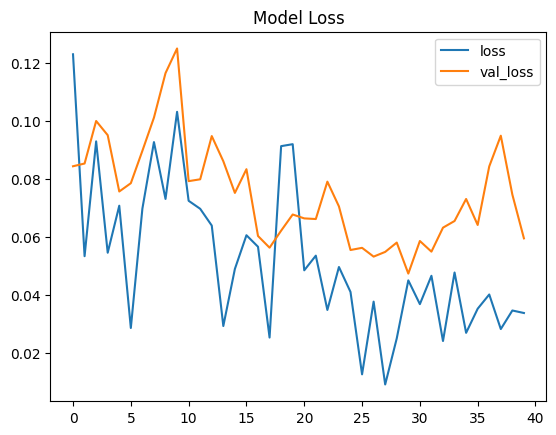

In [7]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./2.5_loss.png')

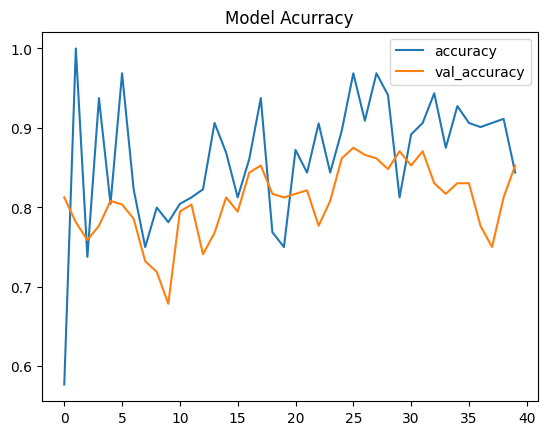

In [8]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./2.5_CNN_accuracy.png')

In [9]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.84375, Val_Accuracy: 0.8526785969734192
Loss: 0.033743966370821, Val_Loss: 0.05951305851340294


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


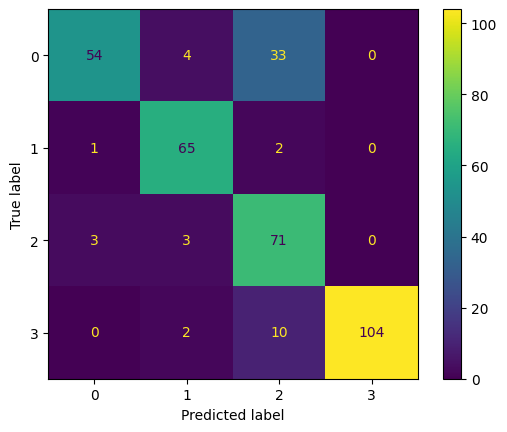

In [10]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [11]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


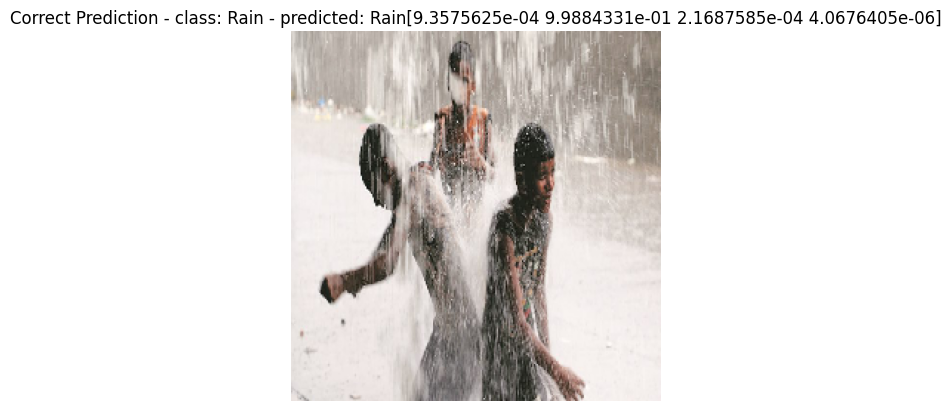

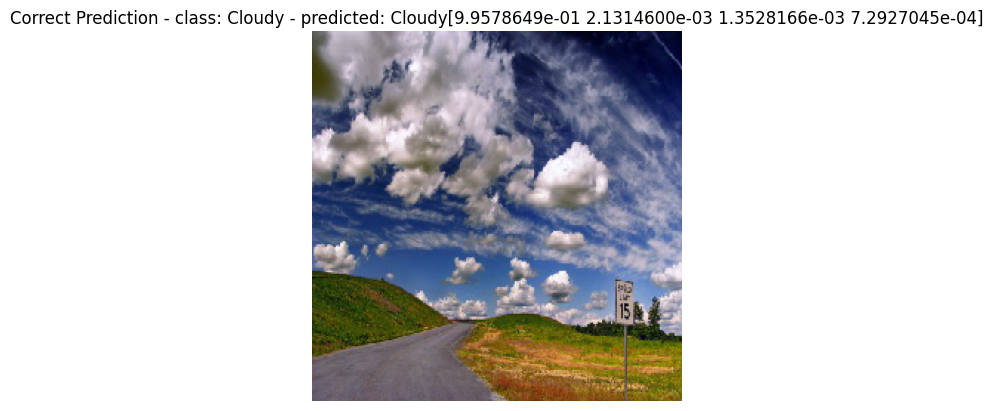

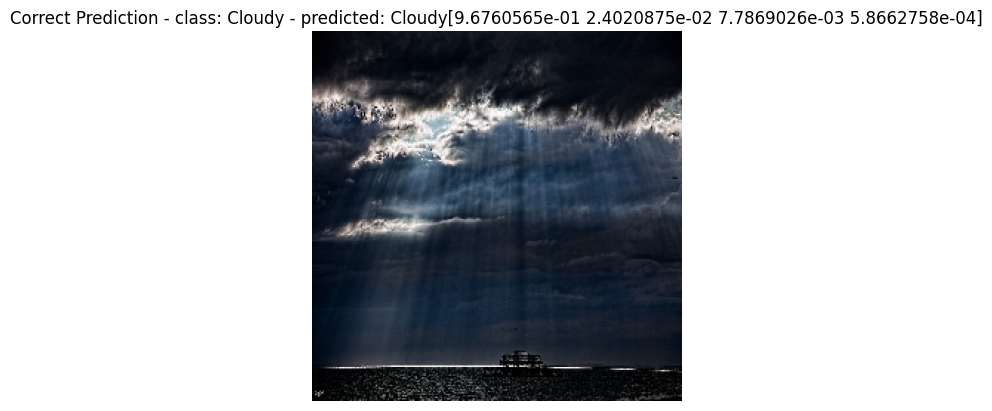

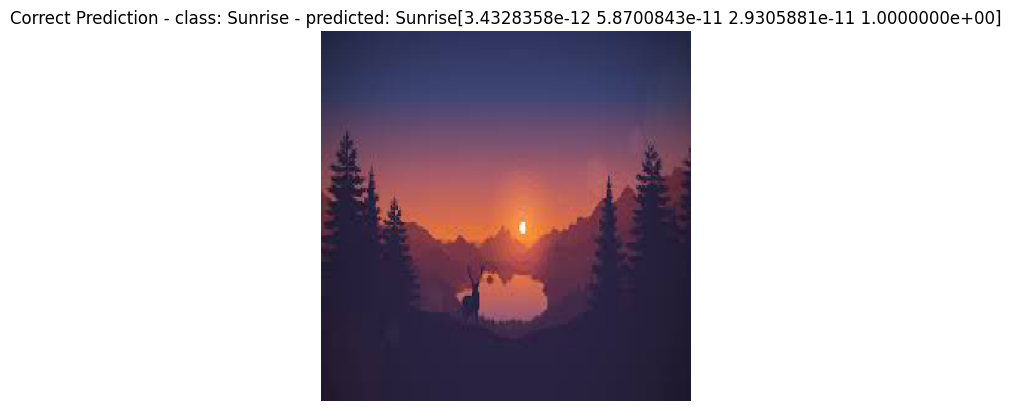

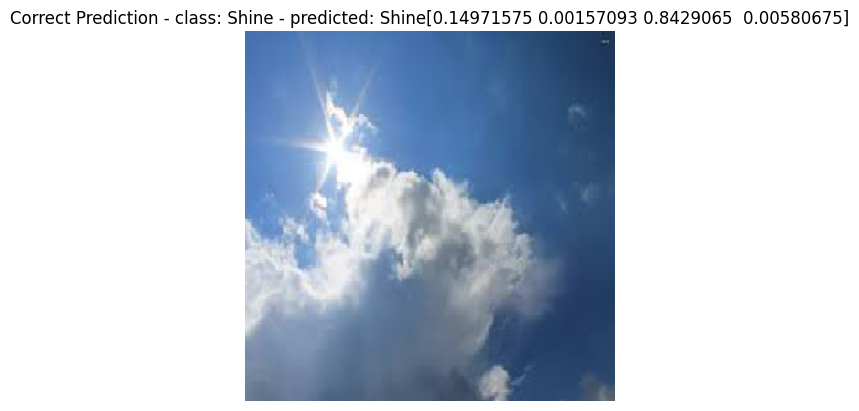

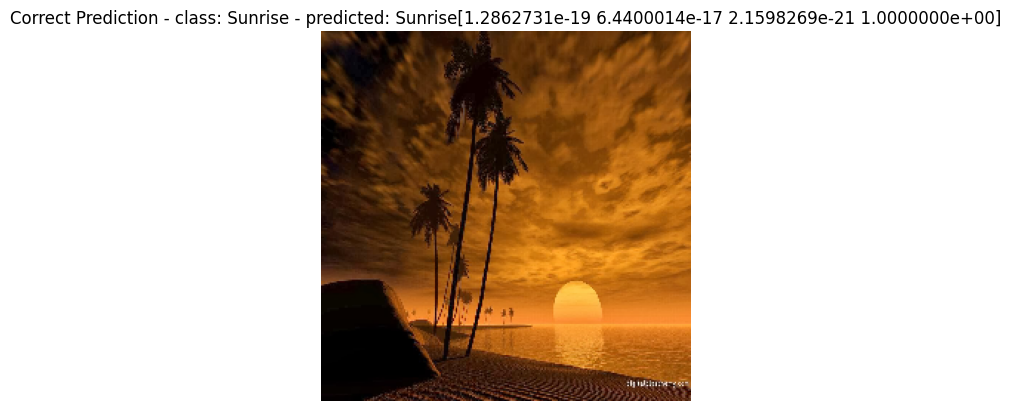

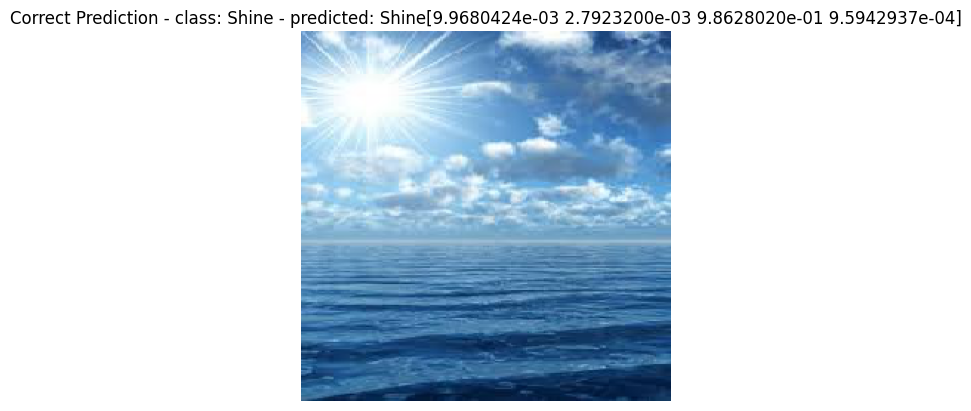

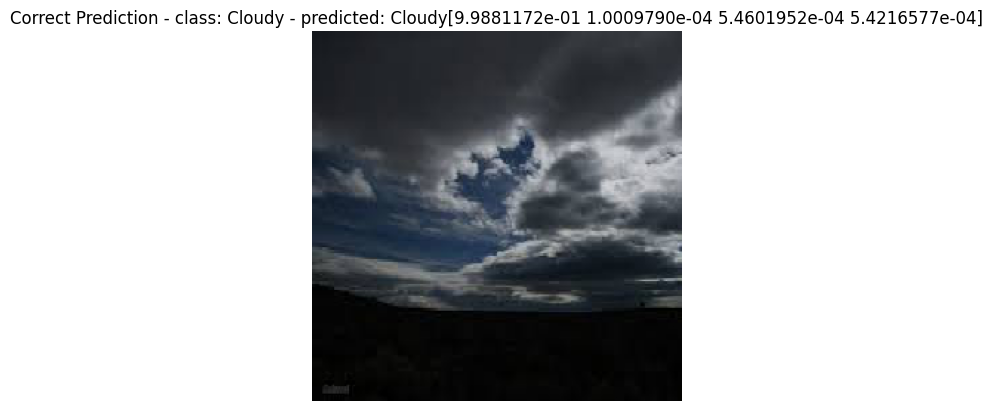

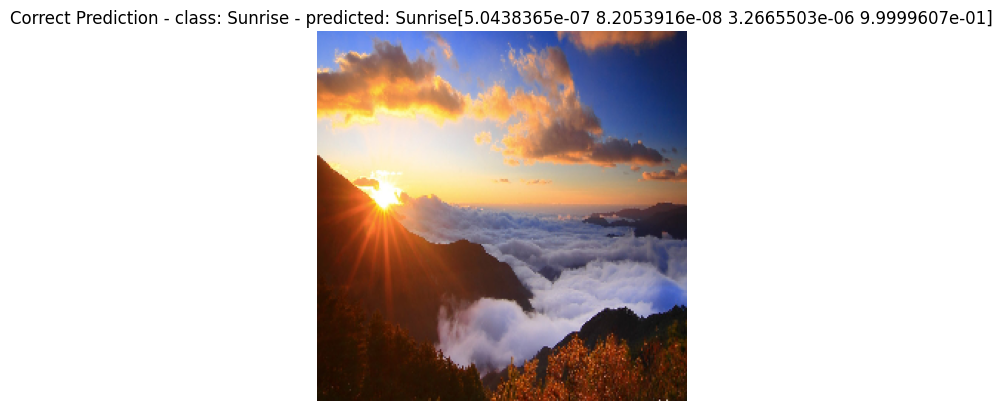

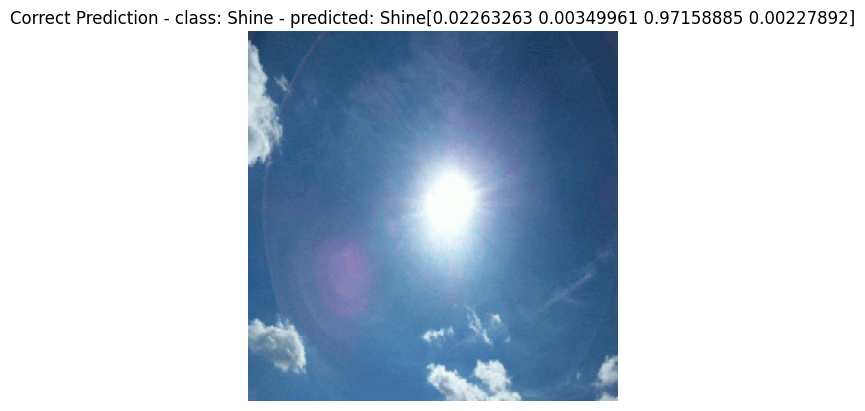

In [12]:
predict_one(model, 10) #<--you can show multiple pictures with this command. Just fill in the number you want to see.